## Answer 2

Importing required libraries like opencv, numpy and matplotlib

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function to capture an image

In [3]:
def capture_image(camera_index=0):
    cap = cv2.VideoCapture(camera_index)
    ret, frame = cap.read()
    cap.release()
    if not ret:
        raise Exception("Could not capture image. Try changing camera index.")
    return frame

Function to apply grayscale

In [4]:
def to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Function for thresholding to black and white

In [5]:
def threshold_black_white(image, threshold=128):
    _, bw_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return bw_image

Function to reduce image to 16 grey levels

In [6]:
def reduce_to_16_greys(image):
    return (image // 16) * 16

Function for Sobel filter

In [7]:
def sobel_filter(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(grad_x, grad_y)
    return np.uint8(sobel)

Function for Canny edge detection

In [8]:
def canny_edge(image, low_threshold=100, high_threshold=200):
    return cv2.Canny(image, low_threshold, high_threshold)

Function for Gaussian blur

In [9]:
def gaussian_blur(image, kernel_size=5):
    kernel = cv2.getGaussianKernel(kernel_size, sigma=-1)
    kernel = kernel @ kernel.T
    return cv2.filter2D(image, -1, kernel)

Function to sharpen image

In [10]:
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

Function to convert RGB to BGR

In [11]:
def rgb_to_bgr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

### Main Code execution

Capture image

In [12]:
frame = capture_image()
grayscale = to_grayscale(frame)

Process image

In [13]:
thresholded = threshold_black_white(grayscale)
reduced_greys = reduce_to_16_greys(grayscale)
sobel = sobel_filter(grayscale)
canny = canny_edge(grayscale)
blurred = gaussian_blur(grayscale)
sharpened = sharpen_image(blurred)
bgr_converted = rgb_to_bgr(frame)

Display in a 2x4 grid

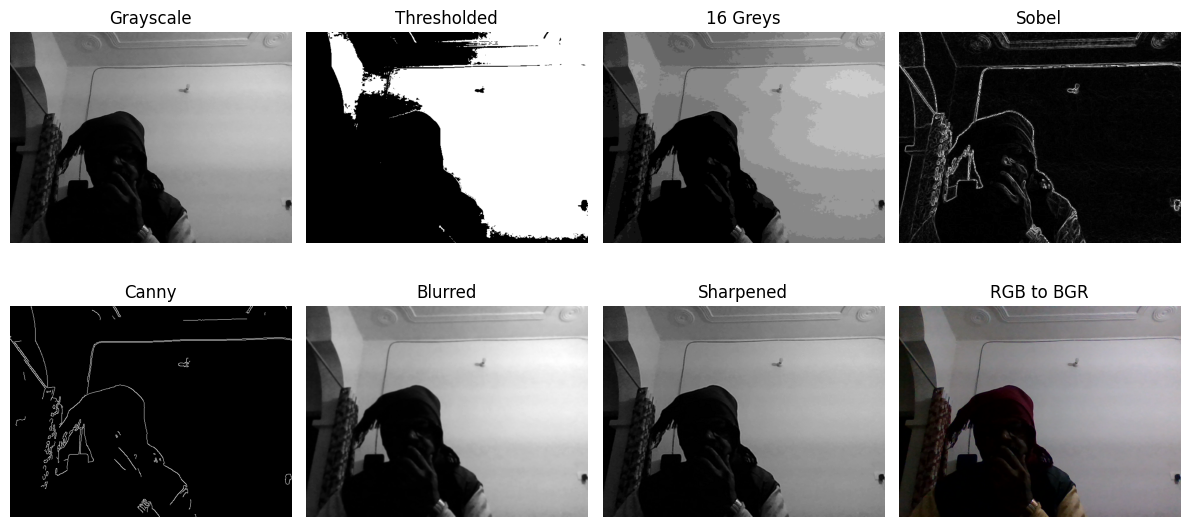

In [14]:
images = [grayscale, thresholded, reduced_greys, sobel,
              canny, blurred, sharpened, bgr_converted]
titles = ["Grayscale", "Thresholded", "16 Greys", "Sobel",
              "Canny", "Blurred", "Sharpened", "RGB to BGR"]
    
plt.figure(figsize=(12, 6))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i + 1)
    cmap = 'gray' if len(img.shape) == 2 else None
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()